<a href="https://colab.research.google.com/github/prad69/MLAssignments/blob/main/Intro_to_Neural_Networks_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import *
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

 Using the MNIST dataset, create a deep learning model to classify the images containing numbers. Use batch normalization and save the model using model checkpoints.

In [11]:
#load data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [12]:
X_train_full.shape


(60000, 28, 28)

In [13]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid = X_train_full[:5000] / 255.
X_train = X_train_full[5000:] / 255.
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

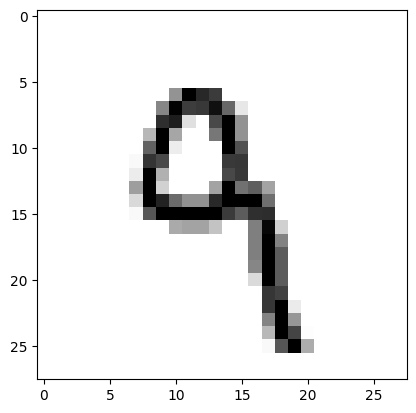

In [15]:
plt.imshow(X_train[24], cmap="binary")
plt.show()

In [16]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_5 (Bat  (None, 100)              

In [17]:
# LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
# OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
# METRICS = ["accuracy"]

LOSS_FUNCTION = tf.losses.sparse_categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.experimental.SGD(0.02, momentum=0.9)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [18]:
# introducing checkpointing
import os
if not os.path.isdir('/content/tmp'):
  os.mkdir('/content/tmp')

In [19]:
checkpoint_filepath = '/content/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [20]:
EPOCHS = 5#30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[model_checkpoint_callback])

Epoch 1/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2141 - accuracy: 0.9338 - val_loss: 0.0931 - val_accuracy: 0.9718
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1078 - accuracy: 0.9657 - val_loss: 0.0858 - val_accuracy: 0.9744
Epoch 3/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0773 - accuracy: 0.9755 - val_loss: 0.0724 - val_accuracy: 0.9788
Epoch 4/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0610 - accuracy: 0.9801 - val_loss: 0.0785 - val_accuracy: 0.9792
Epoch 5/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.0536 - accuracy: 0.9824 - val_loss: 0.0731 - val_accuracy: 0.9834


In [21]:
# The model weights (that are considered the best) are loaded into the model.
model_clf.load_weights(checkpoint_filepath)

In [22]:
# getting a history of training
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.214103,0.933800,0.093068,0.9718
1,0.107846,0.965745,0.085843,0.9744
2,0.077343,0.975491,0.072374,0.9788
3,0.061021,0.980055,0.078538,0.9792
4,0.053596,0.982400,0.073112,0.9834


<Axes: >

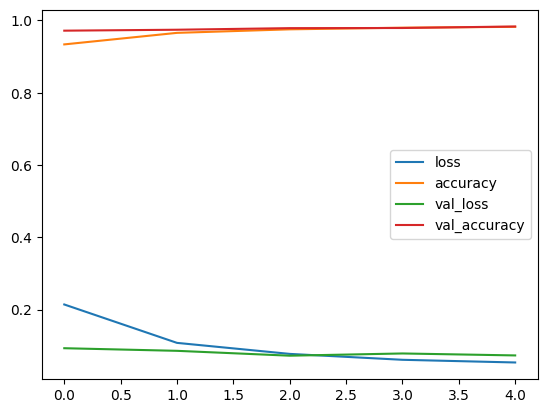

In [23]:
# plotting history metrics
pd.DataFrame(history.history).plot()

In [25]:
# making predictions on subset of data
x_new = X_test[:3]
actual = y_test[:3]
y_prob = model_clf.predict(x_new)
y_prob.round(3)
y_pred = np.argmax(y_prob, axis = -1)

1/1 [==============================] - 0s 463ms/step


In [26]:
y_prob = model_clf.predict(x_new)
np.argmax(y_prob, axis=1)

1/1 [==============================] - 0s 24ms/step


array([7, 2, 1])

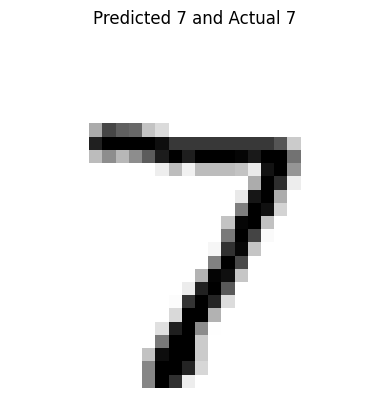

######################


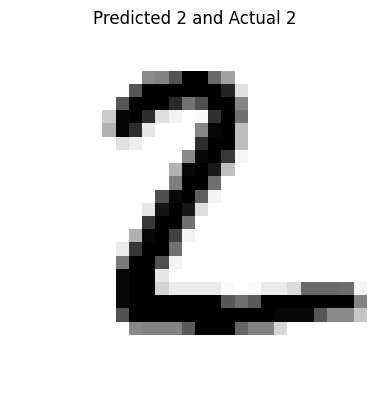

######################


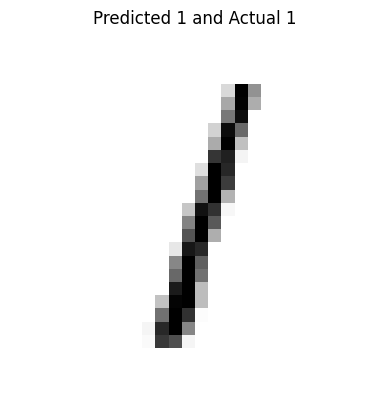

######################


In [27]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

# Question 2:
Using gradient tape, fit a regression line by updating weights.